# Learning Logistic Regression from Scratch
## Introduction
Logistic Regression is a classification algorithm used to predict binary outcomes. It models the probability that a given input belongs to a particular class using the sigmoid function.

### Sigmoid Function:
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
Where:
- \( z = WX + b \) (Linear combination of inputs)
- Output is a probability value between 0 and 1.

## 1. Cost Function
For Logistic Regression, the cost function is the **Binary Cross-Entropy (Log Loss):**
$$ J(W, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i})\right] $$

## 2. Gradient Descent Algorithm
To minimize the cost function, we update the weights and bias using:
$$ W := W - \alpha \frac{\partial J}{\partial W} $$
$$ b := b - \alpha \frac{\partial J}{\partial b} $$

In [31]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Generate Sample Data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = (X > 1).astype(int)  # Binary classification (0 or 1)

In [37]:
# Define Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [39]:
# Initialize Parameters
W = np.random.randn(1, 1)
b = np.zeros((1, 1))
alpha = 0.1  # Learning rate
epochs = 1000  # Number of iterations
m = len(X)  # Number of samples

In [56]:
# Implement Gradient Descent

for epoch in range(epochs):
    z = X.dot(W) + b
    y_pred = sigmoid(z)  # Predictions
    
    # Compute error
    error = y_pred - y
    
    # Compute gradients
    dW = (1/m) * X.T.dot(error)
    db = (1/m) * np.sum(error)
    
    # Update weights
    W -= alpha * dW
    b -= alpha * db

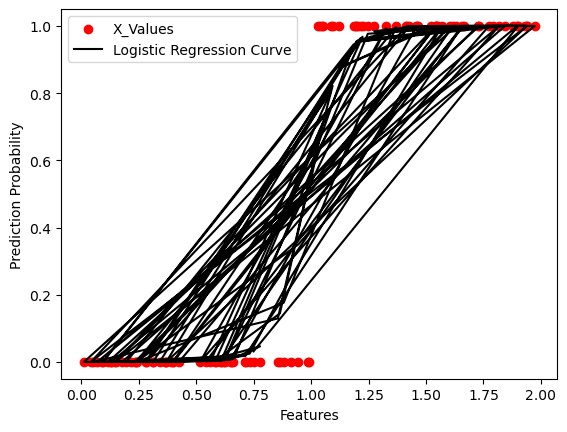

In [60]:
# Plot Decision Boundary
z=X.dot(W) + b
plt.scatter(X, y, color='red', label='X_Values')
plt.plot(X, sigmoid(z), color='black', label='Logistic Regression Curve')
plt.xlabel("Features")
plt.ylabel("Prediction Probability")
plt.legend()
plt.show()

In [64]:
# Evaluate Model using Log Loss
log_loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
print("Log Loss:", log_loss*100)

Log Loss: 5.222141219944781


In [68]:
def get_user_input():
    # Example: Assuming you need 3 input features
    input_features = []
    for i in range(3):
        value = float(input(f"Enter value for feature {i+1}: "))
        input_features.append(value)
    return np.array(input_features)

def main():
    # Load or define your model weights
    weights = np.array([0.1, 0.2, -0.1])  # Example weights

    # Get user input
    user_input = get_user_input()

    # Add bias term if necessary
    user_input = np.insert(user_input,0,1)  # Assuming the first weight is the bias term

    # Generate prediction
    prediction = sigmoid(user_input)
    print(f"Prediction: {(prediction[0])}")

# Run the main function
if __name__ == "__main__":
    main()

Enter value for feature 1:  4
Enter value for feature 2:  5
Enter value for feature 3:  4


Prediction: 0.7310585786300049
